In [37]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

In [38]:
data = np.loadtxt("stellar_radius.dat")

T_desordenada = data[:,0:1]
R_desordenada = data[:,1:2]

x_list,y_list=zip(*sorted(zip(T_desordenada,R_desordenada)))

In [39]:
def interpladorlineal(x_list,y_list,x):
    for i in range(0,len(x_list)-1):
        if (x>=x_list[i] and x<=x_list[i+1]):
            x_prev=x_list[i]#xi
            y_prev=y_list[i]#yi
            x_next=x_list[i+1]#xi+1
            y_next=y_list[i+1]#yi+1
           
            y=((y_next-y_prev)/(x_next-x_prev))*(x-x_prev)+y_prev
            
            return y
                        
x_interpol=np.linspace(min(x_list),max(x_list),5000)
y_interpol=[]
for i in range(0,len(x_interpol)):
    y_interpol.append(interpladorlineal(x_list,y_list,x_interpol[i]))
    

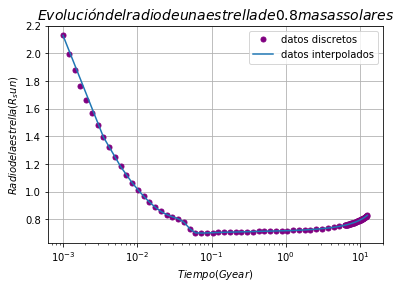

In [40]:
fig=plt.figure()
ax=plt.axes()
ax.plot(x_list,y_list,'.', markersize=10, label='datos discretos', color='purple')
ax.plot(x_interpol,y_interpol,'-', markersize=9, label='datos interpolados')
ax.legend()
plt.legend(fontsize=10)
plt.ylabel(r'$Radio de la estrella (R_sun)$',fontsize=10)
#ax.set_yscale("log")
ax.set_xscale("log")
plt.xlabel(r'$Tiempo (Gyear)$',fontsize=10)
plt.title(r"$Evolución del radio de una estrella de 0.8 masas solares$",fontsize=14)
plt.grid()
plt.show()

In [43]:
def polyLagrange(x_list,y_list,x):
    sum=0
    for i in range(0,len(x_list)):
        prod=1
        for j in range(0,len(x_list)):
            if (j!=i):
                prod = prod*(x-x_list[j])/(x_list[i]-x_list[j])
        sum = sum + y_list[i]*prod
    return sum

In [44]:
x_array=np.linspace(min(x_list),max(x_list),1000)
y_array=[]
for i in range(0,len(x_array)):
    y_array.append(polyLagrange(x_list,y_list,x_array[i]))

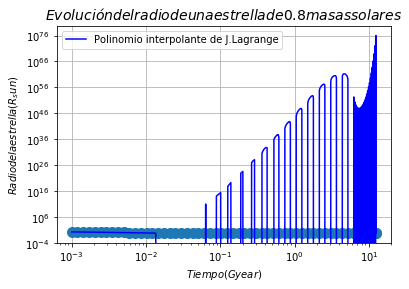

In [47]:
fig=plt.figure()
ax=plt.axes()
ax.plot(x_list,y_list,'.', markersize=20)
#ax.plot(x_list,y_list,'--', color='r', markersize=5)
ax.plot(x_array,y_array,'-', color='blue',label='Polinomio interpolante de J.Lagrange')
plt.legend()
plt.ylabel(r'$Radio de la estrella (R_sun)$',fontsize=10)
ax.set_yscale("log")
ax.set_xscale("log")
plt.xlabel(r'$Tiempo (Gyear)$',fontsize=10)
plt.title(r"$Evolución del radio de una estrella de 0.8 masas solares$",fontsize=14)
plt.grid()
plt.show()